<figure> 
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Minicurso de Ciencia de Datos<center></span>

## <span style="color:Green"><center>Máquinas de Soporte Vectorial</center></span>

<figure> 
<img src="../imagenes/Paisaje-azul.jpg"  width="600" height="600" align="center"/> 
</figure>

Fuente [Wiki-commons](https://commons.wikimedia.org/w/index.php?search=paisaje+mar&title=Special:MediaSearch&go=Go&type=image)

## <span style="color:blue">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Campo Elías Pardo, PhD, cepardot@unal.edu.co
1. Daniel  Montenegro, Msc, dammontenegrore@unal.edu.co
1. Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Equipo de Marketing</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com
1. Laura Mondragón, laura.mondragon2125@gmail.com
1. Jessica López, jelopezme@unal.edu.co

## <span style="color:blue"><center>Separadores lineales</center></span>

### <span style="color:#4CC9F0">Separando el plano 2D linealmente</span>

Una línea recta separa el plano en dos partes disyuntas. Una recta es determinada por la ecuación

$$
\large{
y = w_1 x + b
}
$$

El ejemplo muestra como la recta $y=2x+1$ divide el plan en tres partes disyuntas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-1., 1., 200)
y = 2*x +1
plt.annotate('$y = 2 x + 1$', xy=(-0.20, 0.9),  xycoords='data', rotation=38, size=10, color ='blue')
plt.annotate('$y > 2 x + 1$', xy=(-1.0, 1.5),  xycoords='data', rotation=0, size=10, color ='red')
plt.annotate('$y < 2 x + 1$', xy=(0.5, 0.0),  xycoords='data', rotation=0, size=10, color ='red')
plt.grid()
plt.plot(x,y)
plt.title('Una recta divide el plano en dos tres partes disyuntas', color='blue')
plt.savefig('../imagenes/recta.png')
plt.show()

<figure>
    <center>
        <img src="../imagenes/recta.png" align="center"/> 
            <figcaption>Recta dividiendo el plano. Fuente: Alvaro Montenegro
            </figcaption>
    </center>
</figure>

### <span style="color:#4CC9F0">Un plano separando el espacio 3D linealmente</span>

Una plano separa el espacio en tres partes disyuntas. Un plano es determinado por la ecuación

$$
\large{
z = w_1 x +w_2 y + b
}
$$

El ejemplo muestra como el plano $z = 3x+ - 2y + 3$ divide el plan en tres partes disyuntas:

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)

X, Y = np.meshgrid(x, x)

Z = 3 * X + 2 * Y + 3

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False )
#ax = fig.gca(projection='3d')
fig.add_axes(ax)

# plano
ax.plot_surface(X, Y, Z, color='blue', alpha= 0.3 )

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
#ax.annotate('xxxx', xy=(-0.20, 0.9, 2.0),  xycoords='data',
#             rotation=38, size=10, color ='blue')
#plt.title('Transformación $(x,y) \longrightarrow (x,y, x^2 + y^2)$')
fig.suptitle('Un plano divide el espacio en tres partes disyuntas', fontsize='xx-large')
plt.savefig('../imagenes/plano.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

<figure>
    <center>
        <img src="../imagenes/plano.png" align="center"/> 
            <figcaption>Plano dividiendo el el espacio 3D. 
            </figcaption>
    </center>
</figure>

Fuente: Alvaro Montenegro

## <span style="color:blue"><center>Datos separables linealmente en un espacio euclideano $\mathfrak{R}^n$ </center></span>

### <span style="color:#4CC9F0">Sobre los datos</span>

En esta presentación vamos a considerar conjuntos de datos $S$ determinados por

$$
\large{
S= \{ (\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_p, y_p  ))\}
},
$$

en donde cada $\mathbf{x}$ es un vector en algún espacio euclidiano, digamos $\mathfrak{R}^n$. Cada componente es una característica (`feature`) de un individuo, y diremos que $\mathbf{x}$  es un vector de características. 

Por otro lado estaremos interesados en problemas de aprendizaje supervisado. Así que las $y$'s representan etiquetas para los datos. Por simplicidad de nuestra exposición supondremos que la etiquetas son elementos del conjunto 

$$
\large{
Y = \{-1, 1\}
}.
$$

### <span style="color:#4CC9F0">Hiperplanos</span>

Un hiperplano en el espacio euclidiano $\mathfrak{R}^{n}$ es la generalización de la recta en $\mathfrak{R}^2$ y del plano en $\mathfrak{R}^3$. Un hiperplano es una espacio de dimensión $n$ sumergido en el espacio euclidiano $\mathfrak{R}^{n}$ y se define como el conjunto de puntos $\mathbf{x} \in \mathfrak{R}^{n}$ que satisfacen la ecuación

$$
\large{
w_1 x_1 +w_2 x_2, \ldots,w_{n}x_{n} + b = 0.
}
$$

El vector $\mathbf{w} = (w_1, \ldots, w_n)$ se denominará `vector de pesos` y el número $b$ se denominará `umbral` o sesgo. Observe que un hiperplano en $\mathfrak{R}^{n}$ queda complemetamente determinado por la pareja $(\mathbf{w},b)$

### <span style="color:#4CC9F0">Datos separables linealmente en un espacio euclidiano $\mathfrak{R}^{n}$</span>

Decimos que el el conjunto de puntos $S$ es linealmente separable en  $\mathfrak{R}^{n}$ si  existe un hiperplano $(\mathbf{w},b)$ en  $\mathfrak{R}^{n}$ talque

$$
\begin{align}
w_1 x_1 +w_2 x_2, \ldots,w_{n}x_{n} + b < 0, \quad &\text{ cuando } y=-1\\
w_1 x_1 +w_2 x_2, \ldots,w_{n}x_{n} + b > 0, \quad &\text{ cuando } y = 1
\end{align}
$$

### <span style="color:#4CC9F0">Hiperplanos separadores de un conjunto de puntos</span>

Un hiperplano $(\mathbf{w},b)$ que separa linealmente al conjunto de puntos $S$ se denomina hiperplano separador del conjunto $S$. 

Cuando el conjunto de puntos $S$ es separable linealmente, pueden existir infinitos planos separadores  para $S$. ¿Puede imaginar porque?

In [ ]:
import matplotlib.pyplot as plt
import numpy as
np.random.seed(1000)
x = np.linspace(-1.5, 1.5, 200)
y = 2*x + 1

_x = np.linspace(-1., 1., 50)
_y = 2 * _x + 1
y_eps = np.random.rand(_x.shape[0])
y_out = _y + y_eps 
x_eps =  np.random.rand(_x.shape[0])
x_out = _x + x_eps

#plt.annotate('$y = 2 x + 1$', xy=(-0.20, 0.9),  xycoords='data', rotation=38, size=10, color ='blue')
#plt.annotate('$y > 2 x + 1$', xy=(-1.0, 1.5),  xycoords='data', rotation=0, size=10, color ='red')
#plt.annotate('$y < 2 x + 1$', xy=(0.5, 0.0),  xycoords='data', rotation=0, size=10, color ='red')
plt.grid()
plt.plot(x,y, color='gray')
plt.scatter(_x, y_out, color = 'blue')
plt.scatter(x_out, _y, color = 'red')
plt.title('Una recta divide el plano en dos tres partes disyuntas', color='blue')
plt.savefig('../imagenes/datos_separables_recta.png')
plt.show()

<figure>
    <center>
        <img src="../imagenes/datos_separables_recta.png" align="center"/> 
            <figcaption>Datos separables por una línea recta. 
            </figcaption>
    </center>
</figure>

Fuente: Alvaro Montenegro

## <span style="color:blue"><center>Datos separables linealmente en 3D</center></span>

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -2, -1), ('^', 0, 1)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

x, y = np.meshgrid(xs, ys)

z = x-x + y-y -0.25
ax.plot_surface(x, y, z, color='blue', alpha= 0.005 )
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('../imagenes/puntos_separables_3D.png')
plt.show()

<figure>
    <center>
        <img src="../imagenes/puntos_separables_3D.png" align="center"/> 
            <figcaption>Datos separables por un plano en 3D. 
            </figcaption>
    </center>
</figure>

Fuente: Alvaro Montenegro

## <span style="color:blue"><center>Datos no separables linealmente en 2D</center></span>

El siguiente ejemplo presenta un conjunto de datos en $\mathfrak{R}^2$ que no pueden separarse linealmente.

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

num_in = 100
num_out = 150

np.random.seed(seed=100)
radio_in = np.sqrt(np.random.rand(num_in))
radio_out = np.sqrt(np.random.rand(num_out)) + 1.0

theta_in = np.random.rand(num_in) * 2 * np.pi -np.pi
theta_out = np.random.rand(num_out) * 2* np.pi - np.pi

x_in = radio_in * np.cos(theta_in)
y_in = radio_in * np.sin(theta_in)

x_out = radio_out * np.cos(theta_out)
y_out = radio_out * np.sin(theta_out)


plt.close('all')
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_out, y_out, color ='red')
plt.scatter(x_in, y_in, color ='blue')
# círculo
_t = np.arange(0,7,0.1)
_x = np.cos(_t)
_y = np.sin(_t)
plt.plot(_x,_y,'g-')
plt.xlim(-2,2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos no separables linealmente')
plt.grid(True)
plt.savefig('../imagenes/imag.png')
plt.show()

<figure>
    <center>
        <img src="../imagenes/imag.png" width="600" height="600" align="center"/> 
            <figcaption>Fuente: Alvaro Montenegro
            </figcaption>
    </center>
</figure>

## <span style="color:blue">Transformando los datos para que sean linealmente separables</span>

Existen diferentes estrategias que permiten transformar un conjunto de datos no separable en otro que si sea separable. El **truco** es subir a un espacio más grande. veamos como podríamos hacerlo en el anterior ejemplo.

El truco es usar la siguiente transformación de los datos

$$
\large{
(x,y) \mapsto (x,y, x^2 + y^2)
}.
$$

Observe que el conjunto de datos transformado ahora está en $\mathfrak{R}^3$ y ya es separable linealmente.

El problema en la practica es diseñar procedimientos generales para tratar de incrustar los datos en un espacio más grande, que llamaremos espacio de características o `feature space`, de tal manera que los datos transformados sean separables (o `casi separables, en el sentido de un error pequeño`) en ese espacio.

**Invitamos a imaginar como sería un plano separador en este caso**.

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)

X, Y = np.meshgrid(x, y)

Z = (X**2 + Y**2) 

Z1 = X + Y - 1
Z2 = Z1-Z1 + 1

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False )
#ax = fig.gca(projection='3d')
fig.add_axes(ax)

# plano
#ax.plot_surface(X, Y, Z1, color='blue', alpha= 0.3 )
# superficie
ax.plot_surface(X, Y, Z, color='green', alpha= 0.1)
ax.plot_surface(X, Y, Z2, color='green', alpha= 0.1)

# puntos in
z_in = x_in**2 + y_in**2
ax.scatter3D(x_in,  y_in, z_in, alpha=0.8, s=60, color='blue')

# puntos out
z_out = x_out**2 + y_out**2
ax.scatter3D(x_out,  y_out, z_out, alpha=0.8, s=60, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
#plt.xticks([]) 
#plt.yticks([]) 
#plt.title('Transformación $(x,y) \longrightarrow (x,y, x^2 + y^2)$')
fig.suptitle('Transformación $(x,y) \longrightarrow (x,y, x^2 + y^2)$', fontsize='xx-large')
plt.savefig('../imagenes/transformation.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

<figure>
    <center>
        <img src="../imagenes/transformation_1.png" width="600" height="600" align="center"/> 
            <figcaption>Transformación de los datos a un espacio con más dimensiones
            </figcaption>
    </center>
</figure>

Fuente: Alvaro Montenegro

Si ha observado detenidamente los separadores lineales presentados antes, es decir las líneas rectas y los planos pueden escribirse de la siguiente manera genérica.

$$
\large{w'x - b  = w_1x_1 + w_2x_2 + \ldots w_nx_n -b = 0},
$$

En donde $w$ es el parámetro del modelo que tiene dimensión geométrica $n-1$ en relación con la dimensión $n$ del espacio geométrico que separa. Por ejemplo si estamos en el espacio 3D, se tiene que n=3 y que entonces un separador lineal es un plano con ecuación

$$
\large{w_1 x_1 + w_2x_2 - b =  0},
$$

En ocasiones se reescribe el vector $w$ en la forma $(w_0, \dots, w_n)$ y $x = (1, x_1 \ldots x_n)$, con lo cual ahora la ecuación del separador lineal toma la forma


$$
\large{ w'x = w_0 1 + w_1x_1 + \ldots w_nx_n = 0},
$$

Se dice que esta ecuación define un hiperplano separador en  el espacio euclidiano de dimensión $n$, denotado $\mathfrak{R}^n$.

Como vimos antes, un hiperplano de dimensión $n-1$ separa el correspndiente espacio euclidiano en subespacios:

<figure>
    <center>
        <img src="../imagenes/recta.png" width= 200 heigh = 200 align="center"/> 
            <figcaption>Recta dividiendo el plano. Fuente: Alvaro Montenegro
            </figcaption>
    </center>
</figure>

El hiperplano que corresponde al conjunto de puntos $x$ que cumplen con la ecuación
$$
\large{ w'x = w_0 1 + w_1x_1 + \ldots w_nx_n = 0},
$$

que llamaremos `puntos neutros, indiferentes o de frontera`.

* El subespacio de los puntos que están *'por encima'* del hiperplano, que llamaremos `puntos positivos`  es decir los puntos $x$ que satisfacen
$$
\large{ w'x = w_0 1 + w_1x_1 + \ldots w_nx_n > 0}.
$$

* El subespacio de los puntos que están *'por debajo* del hiperplano que llamaremos `puntos negativos`, es decir los puntos x auq satisfacen
$$
\large{ w'x = w_0 1 + w_1x_1 + \ldots w_nx_n < 0}.
$$

## <span style="color:blue"><center>Producto escalar</center></span>

Si se tenemos dos vectores en el  plano, digamos $(x,y)$ y $(u,w)$, el producto escalar entre estos dos vectores es definido por


$$
\large{(x,y)\begin{pmatrix}x \\ y \end{pmatrix}} = x\ast u + y\ast w.
$$


<figure>
    <center>
        <img src="../imagenes/Animación_del_producto_escala.gif"  width="600" height="600" align="center"/> 
            <figcaption>Producto escalar en $\mathfrak{R}^2$
            </figcaption>
    </center>
</figure>

Fuente: [Wiki commons](https://commons.wikimedia.org/w/index.php?search=producto+escalar&title=Special:MediaSearch&go=Go&type=image).


En general, si  $x = (x_1, \ldots, x_n)$ y $z=(z_1, \ldots z_n)$ son vectores en el espacio euclidiano $\mathfrak{R}^n$, se define  el producto escalar entre $z$ y $w$ como

$$
\huge{<x,z>  = x_1\ast z_1, \ldots x_n  \ast z_n}.
$$

## <span style="color:blue"><center>Norma de un vector</center></span>

Supongamos que $\mathbf{w} \in \mathfrak{R}^n$ es un vector. La norma (o tamaño) del vector se denota por $||\mathbf{w}||$ y se define como

$$
\huge||\mathbf{w}|| = \sqrt{<\mathbf{w}, \mathbf{w}>} = \sqrt{w_1^2+ \ldots + w_n^2}.
$$

## <span style="color:blue"><center>Proyección de un vector sobre otro</center></span>

Si $\mathbf{x}$ y $\mathbf{w}$ son dos vectores en $\mathfrak{R}^n$, la proyección del vector $\mathbf{x}$ sobre el vector $\mathbf{y}$ es denotada $Pr_{\mathbf{w}}\mathbf{x}$ y dedinida como

$$
\large{
Pr_{\mathbf{w}}\mathbf{x} = \left[\frac{<\mathbf{w}, \mathbf{x}>}{||\mathbf{w}||}\right] \frac{\mathbf{w}}{||\mathbf{w}||}
} 
$$


<figure>
    <center>
        <img src="../imagenes/projection.png" width="400" height="400" align="center"/> 
            <figcaption>Proyección de un vector sobre otro
            </figcaption>
    </center>
</figure>

Fuente: [kristakingmath](https://www.kristakingmath.com/blog/scalar-and-vector-projections)

No insteresa con esta noción observar que si $||\mathbf{w}||=1$, entonces $<\mathbf{w}, \mathbf{x}>$ es la longitud de la proyección del vector $\mathbf{x}$  a lo largo del rayo determinado por el vector $\mathbf{w}$.

## <span style="color:blue"><center>Separación lineal y función predictiva</center></span>

En un problema de clasificación en dos clases, por ejemplo para distinguir entre perros y gatos, por lo general tenemos un conjunto de características, digamos $\mathbf{x}=(x_1, \ldots, x_n)$, que esperamos permitan diferenciar a un perro de un gato. 

Dado  un vector de pesos $\mathbf{w}=(w_1,\ldots, w_n)$ y un umbral $b$  definamos la `función predictiva` $f_{\mathbf{w},b}(x) $ mediante

$$
\large{f_{\mathbf{w},b}(x) = \hspace{0.2cm} <\mathbf{w}, \mathbf{x}> + \hspace{0.2cm} b}.
$$

Tenga en cuenta que $<\mathbf{w}, \mathbf{x}>  + \hspace{0.2cm} b=0$ es un hiperplano separador. Entonces, se tiene que

* $f_{\mathbf{w},b}(\mathbf{x})> 0$ para todos los puntos positivos.
* $f_{\mathbf{w},b}(\mathbf{x})= 0$ para todos los puntos de frontera.
* $f_{\mathbf{w},b}(\mathbf{x})< 0$ para todos los puntos negativos.

Ahora definimos la función de clasificación $g_{\mathbf{w},b}()$ mediante

$$
g_{\mathbf{w},b}(x) = 
\begin{cases} 
1 &\text{ si } f_{\mathbf{w},b}(\mathbf{x})\ge 0,\\
-1  &\text{ si } f_{\mathbf{w},b}(\mathbf{x})< 0,\\
\end{cases}
$$



Si etiquetamos las características $\mathbf{x}$ de los perros con -1, y las de los gatos con -1, decimos que los perros y los gatos son `linealmente separables` a partir de sus características $\mathbf{x}$, si es posible construir una función de clasificación $g$, que clasifique correctamente los datos. 



## <span style="color:blue"><center>Algoritmo  genérico para construir un clasificador lineal</center></span>

Consideremos la tarea supervisada de clasificación binaria. Vamos a considerar que los datos viene dados en parejas

$$
\large{
S = \{(x_1, y_1), \ldots, (x_l, y_l) \}}
$$

en donde la $x$'s son las características (features) y las $y$'s son la etiquetas. Cada punto $x_i$ proviene de un conjunto $X \subset \mathfrak{R}^n$ y las etiquetas $y_i$ provienen del conjunto $Y= \{-1, +1\}$ 

El clasificador lineal binario se define mediante la función

$$
g_{\mathbf{w},b}(\mathbf{x}) = \text{signo}(<\mathbf{w},\mathbf{x}> + b),
$$

La función *signo* es definida por

$$
\text{signo}(x) = 
\begin{cases} 
1 &\text{ si } x\ge 0,\\
-1  &\text{ si } x< 0,\\
\end{cases}
$$

Aquí adoptamos la convención *signo(0)= 1*, por comodidad del desarrollo.

En términos estadísticos, el problema consiste en hallar $\mathbf{w}$ y $b$  tal que

$$
\large{
E[0.5|g_{\mathbf{w},b}(\mathbf{x})-y|]
}
$$

es pequeño. El signo $|\cdot|$ se  usa para denotar discrepancia o distancia.

## <span style="color:blue"><center>Transformando un problema de separación no lineal</center></span>

Vamos a regresar a nuestro ejemplo inicial de datos no separables linealmente. Recuerde que ya mostramos como es posible hacer un incrustamiento (embedding) en un espacio más grande. Pasamos del espacio 2D al espacio 3D por medio de la transformación

$$
\large{
(x,y) \mapsto (x,y, x^2 + y^2).
}
$$

En este momento vamos a considerar una nueva transformación dada por

$$
\large{
(x,y) \mapsto (x^2,y^2, \sqrt{2}xy)
}
$$

La siguiente imagen ilustra una vista de como resultan transformados los datos. 


In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# puntos
num_in = 100
num_out = 150

np.random.seed(seed=100)
radio_in = np.sqrt(np.random.rand(num_in))
radio_out = np.sqrt(np.random.rand(num_out)) + 1.0

theta_in = np.random.rand(num_in) * 2 * np.pi -np.pi
theta_out = np.random.rand(num_out) * 2* np.pi - np.pi

x_in = radio_in * np.cos(theta_in)
y_in = radio_in * np.sin(theta_in)

x_out = radio_out * np.cos(theta_out)
y_out = radio_out * np.sin(theta_out)


# transformación


fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False )
#ax = fig.gca(projection='3d')
fig.add_axes(ax)

# puntos in
z_in = np.sqrt(2)* (x_in * y_in)
ax.scatter3D(x_in**2,  y_in*2, z_in, alpha=0.8, s=20, color='blue')

# puntos out
z_out = np.sqrt(2)* (x_out * y_out)
ax.scatter3D(x_out**2,  y_out*2, z_out, alpha=0.8, s=20, color='red')


plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

fig.suptitle('Transformación $(x,y) \longrightarrow (x^2,y^2, \sqrt{2}xy)$', fontsize='xx-large')
#plt.savefig('../imagenes/embedding_2.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

<figure>
    <center>
        <img src="../imagenes/embedding_2.png" width= 600 heigh = 600 align="center"/> 
            <figcaption>Datos transformados con un kernel
            </figcaption>
    </center>
</figure>

Fuente: Alvaro Montenegro

## <span style="color:blue"><center>El truco del kernel</center></span>

Por facilidad los puntos originales serán denotados simplemente  mediante $x=(x_1, x_2)$ y los puntos transformados mediante $\phi(x)$. Entonces tenemos que

$$
\large{
\phi(x) = (x_1^2, x_2^2, \sqrt{2}x_1x_2)
}
$$

Los punto transformados están ahora en $\mathfrak{R}^3$. Vamos en seguida a calcular el producto escalar entre dos vectores transformados $w$ y $u$. Tenemos que

$$
\large{
<\phi(w),\phi(v)> = (w_1v_1 + w_2v_2)^2 = \hspace{0.2cm} <w,v>^2
}
$$

Es decir, que 

**<center>¡Podemos calcular el producto en el espacio destino sin transformar los datos originales!</center>**


## <span style="color:blue"><center>Función Kernel</center></span>

Consideremos una función de sumergimiento $\phi$ tal que

$$
\large{
\phi: x \mapsto \phi(x) \in F
}
$$


El espacio $F$ se denomina espacio de características (features). Un `kernel` es una función $\kappa$ que satisface


$$
\large{
\kappa(x,y) = <\phi(x), \phi(y)>
}
$$

**Interpretación**

Un kernel es una función que calcula el producto escalar de dos datos en el espacio de características, sin necesidad de transformar individualmente cada uno de los datos.

## <span style="color:blue"><center>Función Predictiva revisitada</center></span>



Los matemáticos han demostrado que para un conjunto de datos  $ S= \{(x_1, y_1), \ldots, (x_p, y_p)\}$ 
una función predictiva $f_{\mathbf{w},b}$ puede escribirse como

$$
\large{
f_{\mathbf{w},b}(x) = \sum_{i=1}^p a_i <x_i,x>,
}
$$

Si denotamos por $\mathbf{a}$ al vector de pesos $(a_1, \cdots, a_p)$, como $\mathbf{y}$ al vector de etiquetas, entonces se tiene que

$$
\large{
\mathbf{a} = G^{-1}\mathbf{y}
}
$$

y el punto central aquí es que la `matriz Gram` $G$ tiene como elementos

$$
\large{
G_{i,j} = <\mathbf{x}_i, \mathbf{x}_j>
}
$$

Es decir la matriz de los productos escalares entre todos los puntos del conjunto $S$

Si la matriz Gram $G$ tien problemas para ser invertida, se toma un valor $\lambda>0$ y la matriz identidad $I$ para obtener una solución de la forma 

$$
\large{
\mathbf{\alpha} = \left[G+\lambda I\right]^{-1}\mathbf{y}
}
$$


## <span style="color:blue"><center>Kernel y función predictiva </center></span>

**Hemos llegado a un punto culminante de esta charla**. Para resumir lo importante digamos que:

1. Es posible transformar problemas no separables linealmente en problemas separables linealmente mediante sumergimiento de los datos en espacios de características.
1. Un kernel, calcula el producto escalar en el espacio de características determinado por un sumergimiento, sin necesidad de sumergir cada punto de manera individual.
1. Una función predictiva para separación lineal puede escribirse en términos del producto escalar entre los puntos, mediante el uso de la matriz Gram. 


Entonces, si disponemos de un kernel, la matriz Gram en el espacio de características se puede calcular mediante

$$
\large{
G_{ij} = <\phi(x_i),\phi( x_j)> = \kappa(x_i,x_j)
}.
$$



## <span style="color:blue"><center>Construcción de kernels</center></span>

Supongamos que 

* $\kappa_1$ y $\kappa_2$ son kernels.
* $f(\cdot)$ es una función real.
* $\phi$ es un sumergimiento en $\mathfrak{R}^n$ con kernel $\kappa_3$
* $B$ es una matriz positiva y semidefinida positiva
* $a$ un número real positivo

Entonces las siguientes funciones son kernels.

1. $\kappa(x,z) = \kappa_1(x,z) + \kappa_2(x,z)$
1.  $\kappa(x,z) = a\kappa_1(x,z) $
1.  $\kappa(x,z) = \kappa_1(x,z)\ast \kappa_2(x,z)$
1.  $\kappa(x,z) = f(x) \ast f(y)$
1.  $\kappa(x,z) = x'Bz$

## <span style="color:blue"><center>Kernels polinomiales y gaussianos</center></span>

Supongamos que $\kappa_1(x,z)$ es un kernel $p(\cdot)$ es un polinomio con coeficientes positivos.

Entonces las siguientes funciones son kernels.

1. $\kappa(x,z) = p(\kappa_1(x,z))$
1.  $\kappa(x,z) = \exp (\kappa_1(x,z))$
1.  $\kappa(x,z) = \exp (-||x-z||/(2\sigma^2))$

</center></span>

## <span style="color:blue"><center>SVM I. Margen funcional</center></span>


Para una función real  $g$ definida en el espacio de características, su `margen con respecto  a un ejemplo` $(\mathbf{x},y)$ es definido por

$$
m(g, (\mathbf{x},y)) = y g(\mathbf{x}).
$$

El margen funcional de la función $f$  con el conjunto de entrenamiento $S=(\mathbf{x}_1, y_1), \cdots, \mathbf{x}_l, y_l)$, es definido por

$$
m(S,g) = \min_{1\le i \le l} y_i g(\mathbf{x}_i).
$$

Dada una función $g$ y un deseado margen $\lambda$ denotamos por

$$
\xi_i = (\lambda -y_ig(\mathbf{x},y_i))_+
$$

al valor por el cual $g$ falla para alcanzar el margen $\lambda$. Esta cantidad es conocida como la `variable de holgura` del ejemplo. Recuerde que  $(x)_+= x$ si $x\ge 0$ y cero en otra parte. 

## <span style="color:blue"><center>SVM II. Margen funcional y función de predicción lineal </center></span>

Ya tenemos los requisitos para introducir la máquinas de soporte vectorial (SVM). Para empezar, supongmos que tenemos un conjunto de datos de entrenamiento $S= \{(\mathbf{x}_1, y_1), \cdots, (\mathbf{x}_p, y_p\})$. 

Por otro lado supongamos que existe un función de predicción lineal

$$
g_{\mathbf{w},b}(\mathbf{x}) = <\mathbf{w}, \phi(\mathbf{x})> + \hspace{0.2cm} b,
$$

determinada por un vector de pesos $\mathbf{w}$ y un umbral $b$. Supongamos además que existe una constante $\gamma > 0$ talque 

$$
\xi_i = (\gamma -y_ig(\mathbf{x}_i))_+ = 0,  \text{ para } i = 1,\ldots, p.
$$

Esto significa que el margen $(S,g)$ del conjunto de entrenamiento satisface

$$
m(S,g) = \min_{1\le i \le l } y_ig(\mathbf{x}_i) \ge \lambda.
$$

## <span style="color:blue"><center>SVM III. Interpretación del margen funcional y la función de predicción </center></span>

Informalmente, lo que  queremos  decir es que las dos clases de datos pueden ser separadas por un hiperplano con margen $\lambda$ como se ilustra a continuación.  Decimos en este caso que el conjunto de datos es `linealmente separable` con margen $\lambda$. Además se dice que el clasificador resultante es consistente si clasifica correctamente todos los datos de entrenamiento. 

Margen en el caso de los datos de iris. Fuente: [wiki commons](https://commons.wikimedia.org/w/index.php?search=support+vector+machine&title=Special:MediaSearch&go=Go&type=image)
<figure>
    <center>
        <img src="../imagenes/SVM_-_Iris_dataset.png" width= 400 heigh = 400 align="left"/> 
            <figcaption> 
            </figcaption>
    </center>
</figure>

Por comodidad se puede asumir que el vector de pesos tiene norma 1, es decir $||\mathbf{w}||=1$. En este caso, la expresión $<\mathbf{w}, \phi(\mathbf{x}_i)>$ mide la longitud de la proyección del punto $\phi(\mathbf{x}_i)$ sobre el rayo defindo por $\mathbf{w}$. 

Tambien se tiene que 
$$y_i g(\mathbf{x}_i)= y_i <\mathbf{w}, \phi(\mathbf{x}_i)>$$
mide que tan lejos está el punto $\phi(\mathbf{x}_i)$ de la frontera definida por el hiperplano.

## <span style="color:blue"><center> SVM IV. Máquinas de Soporte Vectorial (SVM)</center></span>

Una máquina de vectores de soporte construye un hiperplano o un conjunto de hiperplanos en un espacio dimensional alto o infinito, que puede usarse para clasificación, regresión u otras tareas. Intuitivamente, una buena separación se logra con el hiperplano que tiene la mayor distancia a los puntos de datos de entrenamiento más cercanos de cualquier clase (el llamado margen funcional), ya que, en general, cuanto mayor es el margen, menor es el error de generalización del clasificador. La siguiente figura muestra la función de decisión para un problema separable linealmente, con tres muestras en los límites del margen, llamados `vectores de soporte`.

<figure>
    <center>
        <img src="../imagenes/SVM_margin.png" width = 600 high= 600 align="center"/> 
            <figcaption>Máquina de Soporte Vectorial
            </figcaption>
    </center>
</figure>

## <span style="color:blue"><center> SVM V. Algoritmo SVM lineal</center></span>

Teniendo en cuenta todo el recorrido hecho hasta el este momento, lo único que resta para construir una máquina de soporte vectorial (SVM) para clasificar un conjunto de entrenamiento $S=\{(\mathbf{x}_1, y_1), \cdots, (\mathbf{x}_l, y_l)\}$ es exhibir un algortimo para lograrlo. 


Si el conjunto de datos $S$ es linealmente separable, el hiperplano $(\mathbf{w},b)$ que resuelve el siguiente problema de optimización 

$$
\begin{align}
\text{minimize}_{\mathbf{w},b} \hspace{1cm} & \tfrac{1}{2}<\mathbf{w},\mathbf{w}>\\
\text{sujeto a} \hspace{1cm} &y_i(<\mathbf{w}, \mathbf{x}_i> + \hspace{0.2cm} b) \ge 1\\
& i= 1, \ldots, p.
\end{align}
$$

+ Los vectores $\mathbf{x}_j$ para los cuales se tiene en la solución que $<\mathbf{w},\mathbf{x}_j>  + b  = \pm 1$ se denominan `vectores de soporte` y son los que actúan como separadores de las clases.


es el hiperplano de margen maximal que separa los puntos de $S$ con margen dado por $\lambda = 1/||\mathbf{w}||$.

Este problema es **convexo**, lo que implica que tiene una única solución. 


## <span style="color:blue"><center> SVM VI. Algoritmo SVM lineal como problema de Programación cuadrática</center></span>

Se puede demostrar que el problema de optimización anterior se puede re-escribir en la siguiente forma, que es la que realmente se implementa con frecuencia

$$
\begin{align}
\text{minimize}_{\mathbf{a}} \hspace{1cm} & \tfrac{1}{2}\mathbf{a}^T \mathbf{Y}\mathbf{K}\mathbf{Y}\mathbf{a} - \mathbf{1}^T\mathbf{a}\\
\text{sujeto a} \hspace{1cm} & \mathbf{a}^T \mathbf{y} = 0,\\
& \mathbf{a} \ge 0
\end{align}
$$

en donde 

* $\mathbf{Y} = \text{diag}(y_1,\ldots, y_p)$
* $\mathbf{K}$ es la matriz Gram de los puntos $\mathbf{x}$, es decir, sus elementos son $k_{ij} = <\mathbf{x}_i, \mathbf{x}_j>$.

El vector $\mathbf{w}$ es obtenido como

$$
\mathbf{w} = \sum_{i=1}^p a_iy_i\mathbf{x}_i.
$$

El umbral $b$ puede obtenerse a partir de cualquier vector soporte $\mathbf{x}_j$, resolviendo al ecuación $<\mathbf{w}, \mathbf{x}_j> + \hspace{0.2cm} b= 1$ o $<\mathbf{w}, \mathbf{x}_j> + \hspace{0.2cm} b= -1$, según sea el caso.

## <span style="color:blue"><center> SVM VII. Algoritmo SVM solución suave</center></span>

El caso más común es cuando las clases son casi separables linealmente. En este caso, se busca el hiperplano separador que minimiza el error de clasificación. 

* En este caso permitimos errores de clasificación introduciendo las variables de holgura $\xi_i$ definidas previamente.
* Introducimos un parámetro de regularización o penalización (trade off)

El problema ahora se reescribe en la forma


$$
\begin{align}
\text{minimize}_{\mathbf{w},b} \hspace{1cm} & \tfrac{1}{2}<\mathbf{w},\mathbf{w}> + C\sum_i \xi_i\\
\text{sujeto a} \hspace{1cm} &y_i(<\mathbf{w}, \mathbf{x}_i> + \hspace{0.2cm} b) \ge 1- \xi_i  \hspace{0.2cm} \forall{i} \\
& \xi_i \ge 0, \hspace{0.2cm} \forall{i}.
\end{align} 
$$

## <span style="color:blue"><center> SVM VIII. Algoritmo SVM no lineal con programación cuadrática</center></span>

Finalmente resolvemos el problema de clasificación no lineal.

El problema se traduce a la solución cuadrática media, conocida como `solución dual`. La única diferencia es que ahora la mtriz Gram usa un kernel definido por el usuario.

Así el problema se escribe como:


$$
\begin{align}
\text{minimize}_{\mathbf{a}} \hspace{1cm} & \tfrac{1}{2}\mathbf{a}^T \mathbf{Y}\mathbf{K}\mathbf{Y}\mathbf{a} - \mathbf{1}^T\mathbf{a}\\
\text{sujeto a} \hspace{1cm} & \mathbf{a}^T \mathbf{y} = 0,\\
& 0 \le \mathbf{a} \le C
\end{align}
$$

en donde 

* $\mathbf{Y} = \text{diag}(y_1,\ldots, y_p)$
* $\mathbf{K}$ es la matriz Gram de los puntos $\phi(\mathbf{x})$, es decir, sus elementos son $k_{ij} = <\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)> = \kappa(\mathbf{x}_i, \mathbf{x}_i)$.

El vector $\mathbf{w}$ es obtenido como

$$
\mathbf{w} = \sum_{i=1}^p a_iy_i\phi(\mathbf{x}_i).
$$

El umbral $b$ puede obtenerse a partir de cualquier vector soporte $\mathbf{x}_j$, resolviendo al ecuación $<\mathbf{w}, \mathbf{x}_j> + \hspace{0.2cm} b= 1$ o $<\mathbf{w}, \mathbf{x}_j> + \hspace{0.2cm} b= -1$, según sea el caso.

## <span style="color:blue"><center> El ejemplo de los datos de Iris con sklearn</center></span>

Finalizamos esta aventura con un ejemplo típico de la estadística. El ejemplo iris. Por comodidad usaremos únicamente dos clases. El ejemplo es tomado de los [tutoriales de sklearn](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm)

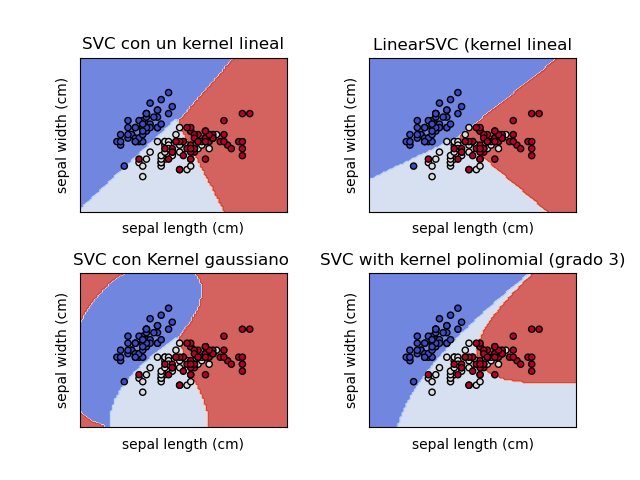

In [26]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC con un kernel lineal",
    "LinearSVC (kernel lineal",
    "SVC con Kernel gaussiano ",
    "SVC with kernel polinomial (grado 3)",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


# <span style="color:blue"><center> ¡Muchas gracias!</center></span><figure> 
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="right"/> 
</figure>